# In-Class Assignment #1
- Please submit this assignment on Moodle by midnight on Thursday, 2/8
- You may work on this assignment as a team or individually, but all team members must submit their work on Moodle.
## Problem Statement
- You are working as a Business Analyst for the New York Mets baseball team
- the Marketing & Media team at the Mets stadium, Citi Field, asks you the following:
- "We like to show engaging displays on the Stadium screens when the Mets are about to get a hit so fans are energized. So, we show our best displays when a Mets batter has 2 strikes. But, oftentimes this situation does not result in a Mets hit. May you help us determine when would be the best times to show our displays based on the situation of the game?"
## Grading Rubric
- This assignment is graded on 4 categories that total 17.5 points
  - Data Preprocessing: ensure the data is accurate, does not contain duplicates, and does not contain null values (3 points)
  - Feature Engineering: employ at least 1 feature engineering technique to the features of the training and testing set (X_train and X_test). You must comment in your code (at the bottom) why you chose your feature engineering technique(s) (7 points)
  - Model Evaluation: the ML model accuracy must be >= 91% (4 points)
  - Model Interpretability: At the bottom of your code, answer the following question: Will the feature engineering technique you used help make the model actionable by the Marketing & Media team? Why? (3.5 points)
## Instructions
0. You may work on this assignment as a team or individual
1. Copy this Google Colab file as your own file on Drive
2. Download the CSV file to your local computer: https://drive.google.com/file/d/1V9UssFbHVjiU_J-IgR9XYDZ_4Vi7nIn5/view?usp=drive_link
3. Load the CSV as a pandas dataframe
4. Look at the data dictionary of the CSV below
5. Use data preprocessing techniques to clean, de-duplicate, and remove null values where you deem appropriate
5. Use at least one feature engineering technique on the training data below (X_train and X_test) before the Machine Learning model is fit and evaluated
6. After you reach your success criteria (listed below), answer the 2 questions at the bottom of the code.
---

# Data Dictionary

mlb pitch data: `MLB_pitch_data_numeric_V4.csv`

grain: each row in the dataset is one pitch at a MLB baseball game

| column | description |
| ----------- | ----------- |
| attendance | number of fans in attendance |
| outfield_distance | distance of the home run fence in right center field |
| inningNumber | baseball inning number |
| inningHalfEventSequenceNumber | baseball half inning number |
| atBatEventSequenceNumber | at bat number of the inning |
| hitterWeight | weight of the batter |
| hitterHeight | height of the batter |
| pitchSpeed | speed of the pitch |
| pitchZone | location of the pitch |
| hitterPitchCount | number of pitches in the at bat |
| startingBalls | number of balls |
| startingStrikes | number of strikes |
| startingOuts | number of outs |
| homeCurrentTotalRuns | current number of runs for the home team |
| awayCurrentTotalRuns | current number of runs for the away team |
| is_hit | binary indicator to show if a the batter got a hit |

---

# Collecting Data

## Data acquisition
- load the CSV from the web as a pandas dataframe below

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

In [ ]:
# Load CSV from web into a pandas dataframe
data = pd.read_csv(r'/content/mlb_pitch_data_numeric_V6.csv')

# Check if data was loaded
if len(data) > 0:
  print(f"data loaded successfull, shape: {data.shape}")

else:
  print("no data was loaded")

data loaded successfull, shape: (300000, 17)


In [ ]:
# Show a sample of the dataframe
data.sample(6)

,attendance,outfield_distance,inningNumber,inningHalfEventSequenceNumber,atBatEventSequenceNumber,hitterWeight,hitterHeight,pitchSpeed,pitchZone,pitcherPitchCount,hitterPitchCount,startingBalls,startingStrikes,startingOuts,homeCurrentTotalRuns,awayCurrentTotalRuns,is_hit
183444,27901,351.0,7,3,1,220,73,91,11,4,1,0,0,0,3,4,0
248255,27839,351.0,9,3,2,240,76,95,6,11,2,1,0,1,3,9,0
116069,37396,346.0,8,3,1,210,73,81,12,10,1,0,0,2,1,5,0
252628,10651,367.0,2,4,3,230,73,88,12,26,2,1,0,2,0,1,0
152754,38781,354.0,8,2,1,250,76,93,5,1,1,0,0,0,4,3,0
179710,40221,351.0,4,2,1,215,76,83,13,49,1,0,0,0,0,0,0


## EDA and Data Preprocessing

### Data Profiling

In [ ]:
# Create a data profiling function
def create_data_profiling_df(data: pd.DataFrame) -> pd.DataFrame:

    # Create an empty dataframe to gather information about each column
    data_profiling_df = pd.DataFrame(columns = ["column_name",
                                                "column_type",
                                                "unique_values",
                                                "duplicate_values",
                                                "null_values",
                                                "extreme_values",
                                                "max",
                                                "min",
                                                "range",
                                                "IQR", 'mean','std'])

    # Loop through each column to add rows to the data_profiling_df dataframe
    for column in data.columns:

        # Create an empty dictionary to store the columns data
        column_dict = {}

        try:
            column_dict["column_name"] = [column]
            column_dict["column_type"] = [data[column].dtypes]
            column_dict["unique_values"] = [len(data[column].unique())]
            column_dict["duplicate_values"] = [(data[column].shape[0] - data[column].isna().sum()) - len(data[column].unique())]
            column_dict["null_values"] = [data[column].isna().sum()]
            column_dict["extreme_values"] = [((data[column]>data[column].mean()+data[column].std()*3)|(data[column]<data[column].mean()-data[column].std()*3)).sum() if (data[column].dtypes != object) else "NA"]
            column_dict["max"] = [data[column].max() if (data[column].dtypes != object) else "NA"]
            column_dict["min"] = [data[column].min() if (data[column].dtypes != object) else "NA"]
            column_dict["range"] = [data[column].max() - data[column].min() if (data[column].dtypes != object) else "NA"]
            column_dict["IQR"] = [data[column].quantile(.75) - data[column].quantile(.25) if (data[column].dtypes != object) else "NA"]
            column_dict["mean"] = [data[column].mean() if (data[column].dtypes != object) else "NA"]
            column_dict["std"] = [data[column].std() if (data[column].dtypes != object) else "NA"]

        except:
            print(f"unable to read column: {column}, you may want to drop this column")

        # Add the information from the columns dict to the final dataframe
        data_profiling_df = pd.concat([data_profiling_df, pd.DataFrame(column_dict)],
                                      ignore_index = True)

    # Sort the final dataframe by unique values descending
    data_profiling_df.sort_values(by = ['unique_values'],
                                  ascending = [False],
                                  inplace=True)

    # Print the function is complete
    print(f"data profiling complete, dataframe contains {len(data_profiling_df)} columns")
    return data_profiling_df

In [ ]:
# Run the data profiling function and print the dataframe
data_profiling_df = create_data_profiling_df(data = data)
data_profiling_df

data profiling complete, dataframe contains 17 columns


,column_name,column_type,unique_values,duplicate_values,null_values,extreme_values,max,min,range,IQR,mean,std
0,attendance,int64,2343,297657,0,0,53621,8766,44855,15617.0,30187.591783,9705.970399
9,pitcherPitchCount,int64,127,299873,0,8,133,0,133,47.0,31.988083,29.458653
7,pitchSpeed,int64,65,299935,0,17620,104,0,104,10.0,82.995077,21.565352
5,hitterWeight,int64,46,299954,0,1768,305,150,155,25.0,207.020447,21.048387
1,outfield_distance,float64,21,299854,125,0,380.0,341.0,39.0,13.0,356.674718,9.577413
15,awayCurrentTotalRuns,int64,21,299979,0,3371,21,0,21,4.0,2.340947,2.561439
14,homeCurrentTotalRuns,int64,19,299981,0,3899,18,0,18,3.0,2.267983,2.583713
2,inningNumber,int64,19,299981,0,902,19,1,18,4.0,4.970953,2.659353
3,inningHalfEventSequenceNumber,int64,17,299983,0,3918,17,1,16,2.0,2.886283,1.627462
4,atBatEventSequenceNumber,int64,16,299984,0,8379,16,1,15,1.0,1.697937,1.265412


In [ ]:
# Print the dataframe shape
data.shape

(300000, 17)

In [ ]:
# Sort the "outfield_distance" column by unique vlaues
np.sort(data['outfield_distance'].unique())

array([341., 342., 344., 346., 347., 348., 350., 351., 353., 354., 356.,
       358., 359., 360., 364., 365., 367., 368., 372., 380.,  nan])

In [ ]:
# Produce the value counts for each of the unique outfield distances
data['outfield_distance'].value_counts()

351.0    41924
356.0    26541
353.0    23733
359.0    21580
365.0    21477
380.0    18368
354.0    18352
348.0    13046
358.0    10783
364.0    10540
372.0    10406
350.0    10375
360.0    10300
346.0    10203
341.0    10174
367.0    10103
344.0     8424
368.0     8039
347.0     7850
342.0     7657
Name: outfield_distance, dtype: int64

### Removing Duplicates

In [ ]:
# Drop duplicates from the dataframe and produce the new shape of the modified dataframe
data.drop_duplicates(inplace = True)
data.shape

(300000, 17)

### Handling Null Values

In [ ]:
# Replace null "outfield_distance" values with the mean "outfield_distance" and round those values to the nearest whole number
import numpy as np
data['outfield_distance'].replace(np.nan, data['outfield_distance'].mean().round(), inplace = True)

In [ ]:
# Convert those whole number floats to integers
data['outfield_distance'] = data['outfield_distance'].astype('int64')

\### Updating/Removing Innaccurate Values (and Outliers)

In [ ]:
# Make new dataframe that excludes outliers/extreme values (using 3 times the standard deviation as the qualifier)
dataNew = data.copy()
for column in dataNew.columns[:-1]:
  dataNew = dataNew.drop(dataNew[(dataNew[column]>dataNew[column].mean()+dataNew[column].std()*3)|(dataNew[column]<dataNew[column].mean()-dataNew[column].std()*3)].index)

In [ ]:
# Run the data profiling function and print the new dataframe
data_profiling_df_New = create_data_profiling_df(data = dataNew)
data_profiling_df_New

data profiling complete, dataframe contains 17 columns


,column_name,column_type,unique_values,duplicate_values,null_values,extreme_values,max,min,range,IQR,mean,std
0,attendance,int64,2343,242179,0,0,53621,8766,44855,15671.0,30219.162840,9731.112792
9,pitcherPitchCount,int64,121,244401,0,0,121,1,120,48.0,34.293847,29.340000
7,pitchSpeed,int64,61,244461,0,1065,104,41,63,9.0,88.129624,6.137556
5,hitterWeight,int64,40,244482,0,573,270,150,120,25.0,206.900622,20.133781
1,outfield_distance,int64,21,244501,0,0,380,341,39,13.0,356.669105,9.559485
8,pitchZone,int64,14,244508,0,0,13,0,13,6.0,8.574541,3.561009
6,hitterHeight,int64,13,244509,0,0,79,67,12,3.0,73.075899,2.159344
2,inningNumber,int64,12,244510,0,0,12,1,11,4.0,4.868032,2.599023
14,homeCurrentTotalRuns,int64,10,244512,0,2591,9,0,9,3.0,2.045337,2.234123
15,awayCurrentTotalRuns,int64,10,244512,0,2503,9,0,9,3.0,2.127809,2.231798


---

## Splitting data into training and testing sets

In [ ]:
# Separate features (X) and target variable (y)
from sklearn.model_selection import train_test_split

X = dataNew[['attendance', 'outfield_distance', 'inningNumber',
       'inningHalfEventSequenceNumber', 'atBatEventSequenceNumber',
       'hitterWeight', 'hitterHeight', 'pitchSpeed', 'pitchZone',
       'pitcherPitchCount', 'hitterPitchCount', 'startingBalls',
       'startingStrikes', 'startingOuts', 'homeCurrentTotalRuns',
       'awayCurrentTotalRuns']]

y = dataNew['is_hit']

X['bmi']=(X['hitterWeight']/(X['hitterHeight']**2)) *703
X.drop(columns = ['hitterWeight','hitterHeight'], inplace= True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"""size of training set: {len(X_train)}
size of testing set: {len(X_test)}""")

size of training set: 171165
size of testing set: 73357


## Feature Engineering

<ipython-input-83-bae922adc4eb>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


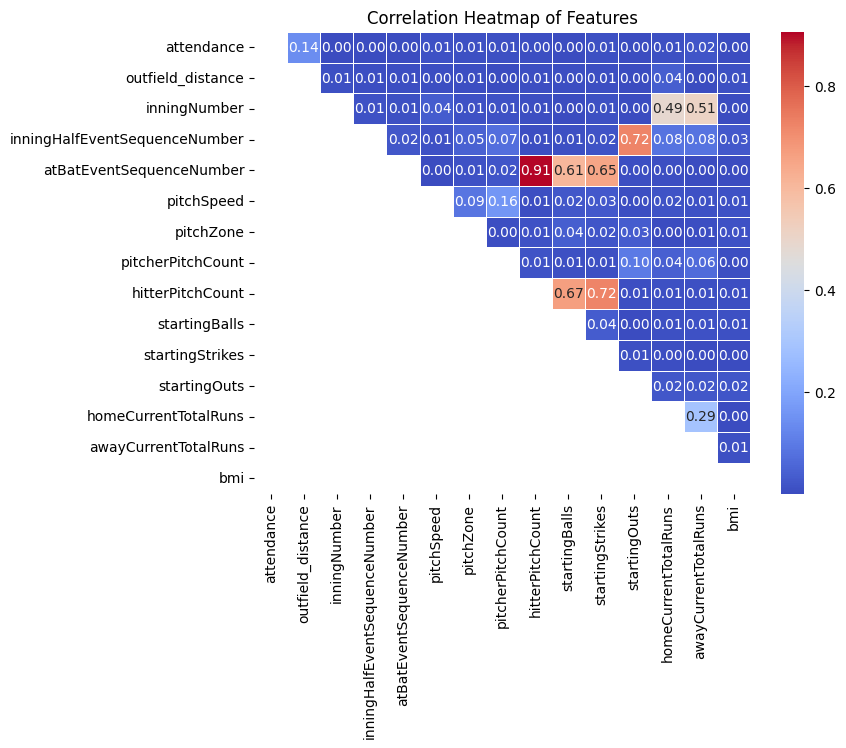

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
corr_matrix = X_train.corr().abs()

# The upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Plot the heatmap of the upper triangle
plt.figure(figsize=(8, 6))
sns.heatmap(upper_triangle, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

Drop the following columns in order to account for collinearity (correlation coefficients > .7):


*   atBatEventSequenceNumber
*   hitterPitchCount
*   inningHalfEventSequenceNumber






In [ ]:
# Drop the following columns in order to account for collinearity (correlation coefficients > .7)
X_train.drop(columns = ['atBatEventSequenceNumber', 'hitterPitchCount', 'inningHalfEventSequenceNumber'], inplace = True)
X_test.drop(columns = ['atBatEventSequenceNumber', 'hitterPitchCount', 'inningHalfEventSequenceNumber'], inplace = True)

**Train - Test Split**



**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the features
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Show example
X_train_normalized

array([[0.56613532, 0.79487179, 0.81818182, ..., 0.11111111, 0.11111111,
        0.52861814],
       [0.38091629, 0.15384615, 0.54545455, ..., 0.33333333, 0.33333333,
        0.37898288],
       [0.60795898, 0.23076923, 0.36363636, ..., 0.22222222, 0.55555556,
        0.52020779],
       ...,
       [0.4750418 , 0.25641026, 0.45454545, ..., 0.33333333, 0.11111111,
        0.80554821],
       [0.88826218, 1.        , 0.18181818, ..., 0.11111111, 0.11111111,
        0.36165481],
       [0.73490135, 0.69230769, 0.45454545, ..., 0.44444444, 0.33333333,
        0.42196955]])

**Standardize**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (mean=0, std=1)
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

# Show example
X_train_scaled

array([[ 0.40505577,  1.60294557,  1.9751908 , ..., -0.46717799,
        -0.50338591,  0.41694564],
       [-0.44841669, -1.01133557,  0.82083224, ...,  0.42815103,
         0.39311753, -0.66801915],
       [ 0.59777535, -0.69762184,  0.05125986, ..., -0.01951348,
         1.28962097,  0.35596443],
       ...,
       [-0.01469489, -0.59305059,  0.43604605, ...,  0.42815103,
        -0.50338591,  2.42489061],
       [ 1.88938696,  2.43951554, -0.71831251, ..., -0.46717799,
        -0.50338591, -0.79366031],
       [ 1.18271423,  1.18466059,  0.43604605, ...,  0.87581555,
         0.39311753, -0.35633443]])

**Unsupervised PCAA**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Show example
X_train_pca

array([[ 0.76414921, -0.6313806 ],
       [ 0.96554217, -0.37623656],
       [ 0.47598756,  2.48814071],
       ...,
       [ 0.08153295,  0.46214427],
       [-0.96443577, -1.38747547],
       [ 1.07270106,  0.49306115]])

**Supervised LDA**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Standardize the features
#scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Apply LDA to reduce dimensionality
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_standardized, y_train)
X_test_lda = lda.transform(X_test_standardized)

---

# Build the Model

In [ ]:
# Build the logistic regression model and print the accuracy scores
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit and evaluate the a model for each feature engineering technique

# Model Evaluation
- What is scikit learn classification report?
  - it provides a comprehensive report for classification models
  - precision: true positives / predicted positives
    - this is the accuracy of the positive predictions
  - recall: true positives / total positives
    - do we catch every postive instances?
  - F1-sore: a harmonic mean of precision and recall
  - support: the number of actual occurences of each class in the dataset
  - accuracy: correct predictions / total predictions

In [ ]:
# Declare the function
def fit_and_evaluate_LR_model(X_train,
                              X_test,
                              y_train,
                              y_test,
                              feature_engineering: str):
  print('-'*7)
  print(f"Logistic Regression model with feature engineering techniques : {feature_engineering}")

  # Initialize and fit the Logistic Regression model
  import random
  logistic_model = LogisticRegression(max_iter=450,
                                      solver='sag',
                                      random_state=random.randint(1,100))
  logistic_model.fit(X_train, y_train)

  # Predict on the test set
  y_pred = logistic_model.predict(X_test)

  # Evaluate the model
  print(f"ML Model accuracy score: {round(accuracy_score(y_test, y_pred), 5)}")

In [ ]:
# Evaluate with no feature engineering
fit_and_evaluate_LR_model(X_train = X_train,
                          X_test = X_test,
                          y_train = y_train,
                          y_test = y_test,
                          feature_engineering = "no feature engineering")

-------
Logistic Regression model with feature engineering techniques : no feature engineering
ML Model accuracy score: 0.92166


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


# Put in your X_train and X_test below to see your results

In [ ]:
# Evaluate with normalization
fit_and_evaluate_LR_model(X_train = X_train_normalized,
                          X_test = X_test_normalized,
                          y_train = y_train,
                          y_test = y_test,
                          feature_engineering = 'normalization')

-------
Logistic Regression model with feature engineering techniques : normalization
ML Model accuracy score: 0.93867


In [ ]:
# Evaluate with standardization
fit_and_evaluate_LR_model(X_train = X_train_scaled,
                          X_test = X_test_scaled,
                          y_train = y_train,
                          y_test = y_test,
                          feature_engineering = 'standarization')

-------
Logistic Regression model with feature engineering techniques : standarization
ML Model accuracy score: 0.93867


In [ ]:
# Evaluate with PCA
fit_and_evaluate_LR_model(X_train = X_train_pca,
                          X_test = X_test_pca,
                          y_train = y_train,
                          y_test = y_test,
                          feature_engineering = 'pca')

-------
Logistic Regression model with feature engineering techniques : pca
ML Model accuracy score: 0.92166


In [ ]:
# Evaluate with LDA
fit_and_evaluate_LR_model(X_train = X_train_lda,
                          X_test = X_test_lda,
                          y_train = y_train,
                          y_test = y_test,
                          feature_engineering = 'lda')

-------
Logistic Regression model with feature engineering techniques : lda
ML Model accuracy score: 0.93991


In [ ]:
# Which feature engineering techniques did you use? Why?

#For feature engineering, we decided to drop any columns that had a correlation coefficient higher than 0.70 to account for multicollinearity. However, we also combined the
#"hitterWeight" and "hitterHeight" columns into one "bmi" column using the formula bmi = (weight/height^2) * 703 since those two features also had a fairly high correlation
#coefficient of 0.53. Furthermore, we applied all four data transformation techniques (standardization, normalization, PCA, and LDA) to determine which model would provide
#the highest accuracy score upon evaluation. The best technique ended up being LDA which produced an accuracy score of 0.93991.

In [ ]:
#  Will the feature engineering technique you used help make the model actionable by the Marketing & Media team? Why?

#The feature engineering techniqes we used help make the model actionable by the Marketing & Media team since they initially were basing the portrayal of their engaging displays
#on a player being on his second strike. However, through the model we created, the Marketing and Media team can now predict when to show these displays with an accuracy of 93.991%
#based upon a variety of features that best encompass an individual player's situation.

In [ ]:
# Team members: Daniel De Las Heras, Ryan Pittman, and Harry_Beasley